##############
  PROBLEMA 1  
##############
Gráfica de la función potencial normalizado


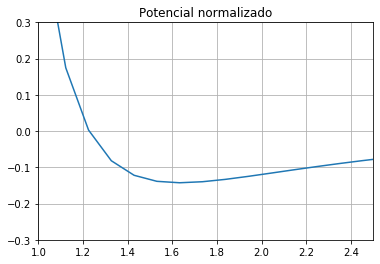


>>>ITEM 1.1  
[Método Bisección] Existe una raíz entre 1.63050537109375 y 1.630517578125
error aparente :  7.486655037423078e-06    < 1e-05

>>>ITEM 1.3.1 [error valor mínimo]  
Los valores buscados son alfa= 0.91509 , beta= -3.69527 [hallados con regresion lineal]


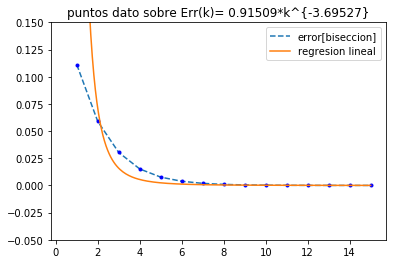


>>>ITEM 1.2  
[Newton-Raphson]: Existe una raíz entre 1.3631661842321812 y 1.3631678245781322
error aparente :  1.2033338239759223e-06    < 1e-05
Aproximadamente, esto es: F( 1.3631670044051567 )= -0.1

>>>ITEM 1.3.2 [error f(x)=-0.1]  

Los valores buscados son alfa= 0.47929 , beta= -5.86915 [hallados con regresion lineal]


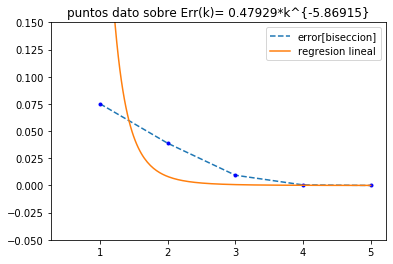


##############
  PROBLEMA 2  
##############
Gráfica de la función potencial normalizado


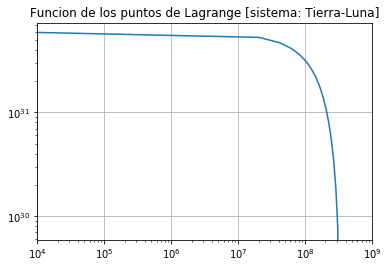

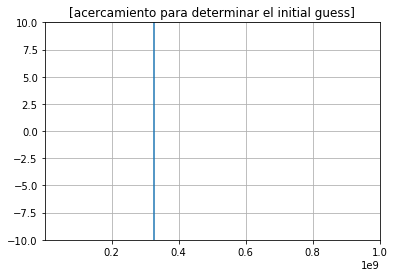

[Newton-Raphson]: Existe una raíz entre 325966970.28863674 y 325966627.0393722
error aparente :  1.053018544284865e-06    < 1e-05

Aproximadamente, esto es: L1= 325966798.66400445 <> punto de Lagrange

##############
  PROBLEMA 3  
##############

La matrices del problema serán:
[  1.   0.   0. -15.]   [ x0 ]   [ 187.29 ]
[ -1.   1.   0. -10.]   [ x1 ]   [ 104.05 ]
[ 0. -1.  1. -8.]   [ x2 ]   [ -78.48 ]
[ 0.  0. -1. -5.]   [ x3 ]   [ -49.05 ]
 

Por el método de eliminación de Gauss
Las nuevas matrices serán
M= [[  1.   0.   0. -15.]
 [  0.   1.   0. -25.]
 [  0.   0.   1. -33.]
 [  0.   0.   0. -38.]]
N= [187.29 291.34 212.86 163.81]


Siendo los valores para las tensiones y la aceleracion respectivamente:

[      T1           T2           T3      aceleracion]
[122.62815789 183.57026316  70.60394737  -4.31078947]

El sistema se moverá hacia la izquierda con una aceleracion a=4.31 m/s2

##############
  PROBLEMA 4  
##############


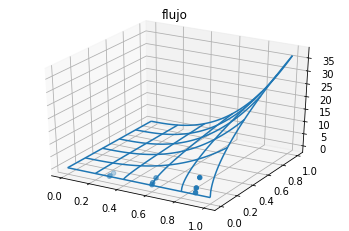

>>>FIN


In [15]:
#! /usr/bin/python3

from numpy import *

import matplotlib.pyplot as plt # from pylab import plot,show

from matplotlib.pyplot import figure

from Chira_modulo import *

import warnings
warnings.filterwarnings("ignore")



#######################
#######################
#######################
print("##############")
print("  PROBLEMA 1  ")
print("##############")

##
print("Gráfica de la función potencial normalizado")
xs= linspace(0,5)
ys= fun_pot_normalizado(xs)
plt.ylim(top=0.3,bottom=-0.3)
plt.xlim(left=1,right=2.5)
plt.title("Potencial normalizado")
plt.plot(xs,ys)
plt.grid()
plt.show()
print("")


##
print(">>>ITEM 1.1  ")
Err_bisec,ai,bi,epsilon=biseccion(1.4,1.8,derivfun_pot_normalizado) #se le ingresa el rango donde estaria el minimo
print("[Método Bisección] Existe una raíz entre",ai,"y",bi)
print("error aparente : ", err_ap(ai,bi), "   <", epsilon)
n=len(Err_bisec)
space_err= array(range(1,n+1))
print("")


##
print(">>>ITEM 1.3.1 [error valor mínimo]  ")
#linealizacion:
#ln(Err) = ln(alfa) + beta*ln(k)
ln1Err = log(Err_bisec)
ln1k = log(space_err)

#hallamos los coeficientes a0 y a1 para la linealizacion
a10,a11=coeficientes_linreg(ln1k,ln1Err)

#de la linealizacion: a0 = ln(alfa)  ,  a1= beta
alfa1= exp(a10)
beta1= a11

#creando espacio para graficar la funcion obtenida
nro1_elemens=len(space_err)
xs1prueba=linspace(0.5,nro1_elemens,200) 

f1=alfa1*(xs1prueba**beta1)

print("Los valores buscados son alfa=",round(alfa1, 5),", beta=",round(beta1, 5),"[hallados con regresion lineal]")
plt.plot(space_err,Err_bisec,'--',label="error[biseccion]")
plt.plot(space_err,Err_bisec,'b.')
plt.plot(xs1prueba,f1,label="regresion lineal")
plt.legend()
plt.ylim(top=0.15,bottom=-0.05)
plt.title("puntos dato sobre Err(k)= 0.91509*k^{-3.69527}")
plt.show()
print("")


##
print(">>>ITEM 1.2  ")
''' 
    de la grafica notamos que entre los puntos 1.2 y 1.4 se sigue, aproximadamente el mismo 
    comportamiento decreciente. Por esta razón, haremos una interpolacion entre estos puntos
    y de esa forma encontraremos el valor para f(x)=-0.1
'''
xd,xnr,Err_nr=newton_raphson(epsilon,1.2,f_ex2_pot_normalizado,derivfun_pot_normalizado)
print("[Newton-Raphson]: Existe una raíz entre",xd,"y",xnr)
print("error aparente : ", err_ap(xnr,xd), "   <", epsilon)
print("Aproximadamente, esto es: F(",0.5*(xd+xnr),")= -0.1")
#espacio para el error
m=len(Err_nr)
space2_err= array(range(1,m+1))
print("")


##
print(">>>ITEM 1.3.2 [error f(x)=-0.1]  ")
#linealizacion:
#ln(Err) = ln(alfa) + beta*ln(k)
ln2Err = log(Err_nr)
ln2k = log(space2_err)

#hallamos los coeficientes a0 y a1 para la linealizacion
a20,a21=coeficientes_linreg(ln2k,ln2Err)

#de la linealizacion: a20 = ln(alfa)  ,  a21= beta
alfa2= exp(a20)
beta2= a21

#creando espacio para graficar la funcion obtenida
nro2_elemens=len(space2_err)
xs2prueba=linspace(0.5,nro2_elemens,200) 

f2=alfa2*(xs2prueba**beta2)

print("")
print("Los valores buscados son alfa=",round(alfa2, 5),", beta=",round(beta2, 5),"[hallados con regresion lineal]")
plt.plot(space2_err,Err_nr,'--',label="error[biseccion]")
plt.plot(space2_err,Err_nr,'b.')
plt.plot(xs2prueba,f2,label="regresion lineal")
plt.legend()
plt.ylim(top=0.15,bottom=-0.05)
plt.title("puntos dato sobre Err(k)= 0.47929*k^{-5.86915}")
plt.show()
print("")





#######################
#######################
#######################
print("##############")
print("  PROBLEMA 2  ")
print("##############")

#la ecuación del problema será:
'''
    GM(R-x)**2 - Gmx**2 - (w**2)(x**2)(R-x)**2=0
'''
##
print("Gráfica de la función potencial normalizado")
xs2= linspace(10**4,10**9)
ys2= f_ptolagrge(xs2)
# plt.ylim(top=,bottom=0)
plt.xlim(left=10**4,right=10**9)
plt.title("Funcion de los puntos de Lagrange [sistema: Tierra-Luna]")
plt.yscale('log')
plt.xscale('log')
plt.plot(xs2,ys2)
plt.grid()
plt.show()

##
plt.ylim(top=10,bottom=10*-1)
plt.xlim(left=10**4,right=10**9)
plt.title("[acercamiento para determinar el initial guess]")
plt.plot(xs2,ys2)
plt.grid()
plt.show()
#según esta gráfica el initial guess debe estar entre 0.2*10**9 y 0.4*10*99

##
#El initial guess para el método de Newton-Raphson puede ser un poco lejano al valor real aproximado
#por lo que no necesitariamos saber con tanta precision un valor cercano a la raiz,
#sin embargo, esto generará muchas iteraciones innecesarias que podría evitarse eligiendo
#un initial guess más cercano

Ls1,Ls2,ErrLs_nr=newton_raphson(epsilon,0.2*10**9,f_ptolagrge,deriv_fptolag)#0.2*10**9=initial_guess
print("[Newton-Raphson]: Existe una raíz entre",Ls1,"y",Ls2)
print("error aparente : ", err_ap(Ls1,Ls2), "   <", epsilon)
print("")
print("Aproximadamente, esto es: L1=",0.5*(Ls1+Ls2), "<> punto de Lagrange")
print("")





#######################
#######################
#######################
print("##############")
print("  PROBLEMA 3  ")
print("##############")

M=array([(1,0,0,-15), 
        (-1,1,0,-10),
        (0,-1,1,-8),
        (0, 0,-1,-5)],float)

N=array([187.29,104.05,-78.48,-49.05],float)

print("")
print("La matrices del problema serán:")
print(imprimir_problema(M,N))
print("")
print("Por el método de eliminación de Gauss")
print(Elim_Gauss(M,N))
print("")
print("Siendo los valores para las tensiones y la aceleracion respectivamente:")
print("")
print("[      T1           T2           T3      aceleracion]")
print(sust_inv(M,N))
print("")
print("El sistema se moverá hacia la izquierda con una aceleracion a=4.31 m/s2")
print("") 






#######################
#######################
#######################
print("##############")
print("  PROBLEMA 4  ")
print("##############")

##datos
Q=[0.04,0.24,0.69,0.13,0.82,2.38,0.31,1.95,5.66]
S=[0.001,0.001,0.001,0.01,0.01,0.01,0.05,0.05,0.05]
D=[0.3,0.6,0.9,0.3,0.6,0.9,0.3,0.6,0.9]

#linealizaremos de modo que la ecuacion será
'''
    ln(Q) = ln(a0) + a1*ln(D) + a2*ln(S)
'''
lnQ=log(Q)
lnD=log(D)
lnS=log(S)

#obtenemos las contantes de la ecuacion ln(Q) = ln(a0) + a1*ln(D) + a2*ln(S)
a40,a41,a42=reg_pol3(lnQ,lnD,lnS)

#por la linealizacion alfa0=exp(a0) , alfa1 = a1 , alfa2=a2 
alfa0 =exp(a40)
alfa1 = a41 
alfa2 = a42

#luego en la funcion
Ds= linspace(0,1,200)
Ss= linspace(0,1,200)
X, Y = meshgrid(Ds, Ss)
FunQ=alfa0*(X**alfa1)*(Y**alfa2)



from mpl_toolkits.mplot3d import Axes3D #para poder dibujar la superficie

fig = plt.figure()
a4x = fig.gca(projection='3d')
a4x.scatter(D, S, Q, marker='o') #levemente obeservado en la base de la superficie
# plt.show()
sup = plt.gca(projection='3d')

#para que se puedan observar los puntos datos
sup.plot_wireframe(X, Y, FunQ, rstride=40, cstride=40) 

#decomentar la siguiente linea si se quiere observar la superficie coloreada
# sup.plot_surface(X, Y, FunQ, rstride=1, cstride=1,cmap=plt.cm.coolwarm, edgecolor='none')
sup.set_title('flujo')

plt.show()

print(">>>FIN")